# SVM for rock paper scissor picture


In [1]:
from os import listdir
from PIL import Image as PImage
import numpy as np

def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image).convert('L')
        loadedImages.append(np.array(img))

    return loadedImages

def dataSplit(data, percentage):
    # splits input data into train and validation set
    treshold = round(data.shape[0] * percentage)
    trainData = data[:treshold,]
    valiData = data[-(data.shape[0] - treshold):,]
    return trainData, valiData

def shuffle(x, y):
    p = np.random.permutation(len(y))
    return x[p], y[p]


path = "C:/Users/ondra/Python Projects/datasets/RockPaperScissors/"

# your images in an array
imgs_paper = np.array(loadImages(path + "paper/"))
imgs_rock = np.array(loadImages(path + "rock/"))
imgs_scissors = np.array(loadImages(path + "scissors/"))

In [2]:

# load labels to Y
Y = [[0] * imgs_paper.shape[0], [1] * imgs_rock.shape[0], [2] * imgs_scissors.shape[0]]
Y = np.hstack(Y)
# put data into one array
imgs = np.concatenate((imgs_paper, imgs_rock, imgs_scissors), axis=0)
# reshape into rows
imgs_rows = imgs.reshape(2188, 200 * 300)
# shuffle the data
imgs_rows, Y = shuffle(imgs_rows, Y)

# for better performance, lets select just 1000 images

# imgs_rows = imgs_rows[:1000,]
# Y = Y[:1000]

# split data into train and test
Xtrain, Xtest = dataSplit(imgs_rows, 0.85)
yTrain, yTest = dataSplit(Y, 0.85)
# split train data into validation and train
trainData, valiData = dataSplit(Xtrain, 0.8)
trainY, valiY = dataSplit(yTrain, 0.8)

In [3]:
# images have a lot of pixels, 60000, we could try to reduce this number 
# without losing information hopefully
trainData.shape

(1488, 60000)

In [4]:
from sklearn import svm

score = []
fittime = []
scoretime = []

model = svm.SVC(random_state=42)

Text(0, 0.5, 'Variance')

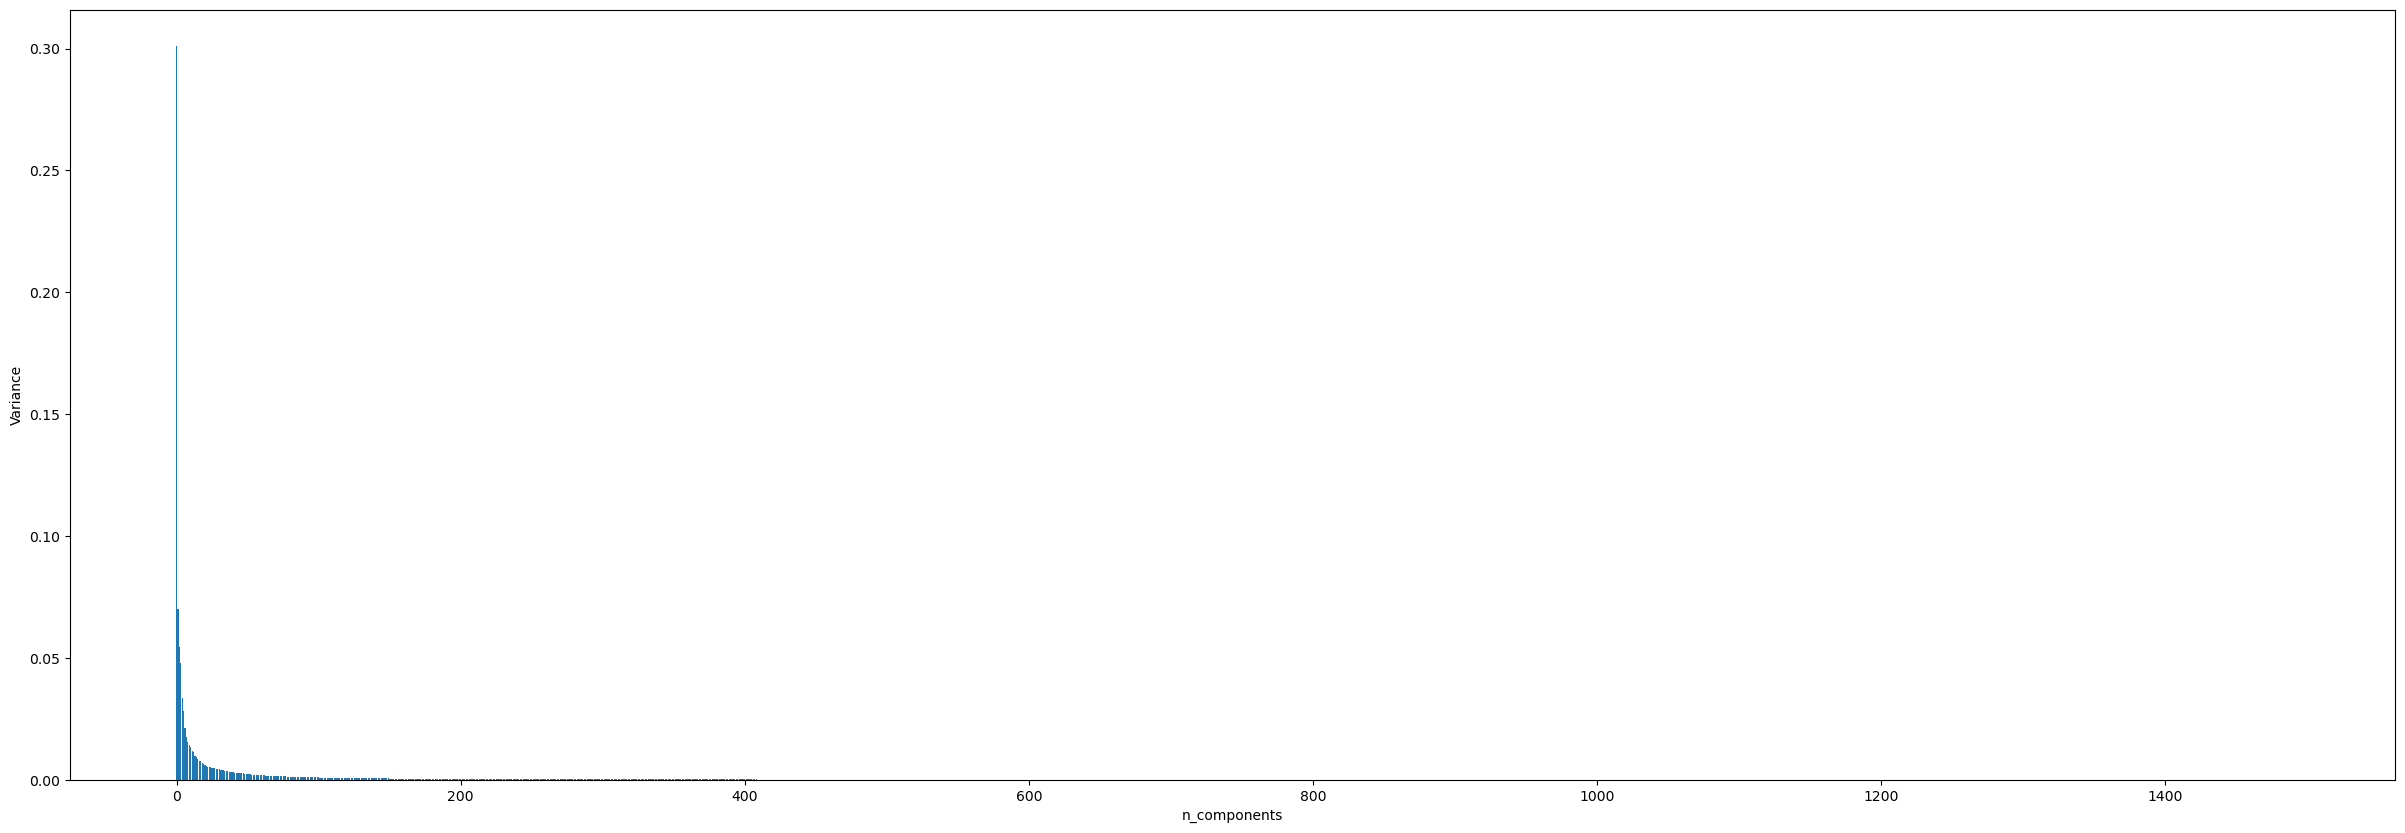

In [5]:
# lets 1st check the model for all of parameters
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt, matplotlib.image as mpimg

#standardized data
sc = StandardScaler().fit(trainData)
X_std_train = sc.transform(trainData)
X_std_test = sc.transform(valiData)

#If n_components is not set then all components are stored 
sklearn_pca = sklearnPCA().fit(X_std_train)
train_pca = sklearn_pca.transform(X_std_train)
test_pca = sklearn_pca.transform(X_std_test)

#Percentage of variance explained by each of the selected components.
#If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
var_per = sklearn_pca.explained_variance_ratio_
cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(30,10))
ind = np.arange(len(var_per)) 
plt.bar(ind,var_per)
plt.xlabel('n_components')
plt.ylabel('Variance')


In [9]:
n_comp=len(cum_var_per[cum_var_per <= 0.90])
print("Keeping 90% Info with ",n_comp," components")
sklearn_pca = sklearnPCA(n_components=n_comp)
train_pca = sklearn_pca.fit_transform(X_std_train)
test_pca = sklearn_pca.transform(X_std_test)
print("Shape before PCA for Train: ",X_std_train.shape)
print("Shape after PCA for Train: ",train_pca.shape)
print("Shape before PCA for Test: ",X_std_test.shape)
print("Shape after PCA for Test: ",test_pca.shape)

Keeping 90% Info with  121  components
Shape before PCA for Train:  (1488, 60000)
Shape after PCA for Train:  (1488, 121)
Shape before PCA for Test:  (372, 60000)
Shape after PCA for Test:  (372, 121)


In [10]:
import time 

start_time = time.time()
model.fit(train_pca, trainY)
fittime = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(fittime)))
start_time = time.time()
score=model.score(test_pca,valiY)
print("Accuracy for reduced: ",score)
scoretime = time.time() - start_time
print("Time consumed to score model: ",time.strftime("%H:%M:%S", time.gmtime(scoretime)))
case3=[score,fittime,scoretime]

Time consumed to fit model:  00:00:00
Accuracy for reduced:  0.8736559139784946
Time consumed to score model:  00:00:00


In [22]:
print(model.predict(test_pca))

valiY


[0 2 0 2 0 1 0 1 1 1 1 1 2 0 0 2 1 0 2 1 0 2 1 2 0 2 2 2 1 2 2 0 1 2 0 1 1
 1 1 2 0 1 0 2 2 0 2 2 2 1 2 2 2 2 1 1 1 2 0 2 0 1 2 2 2 2 0 0 1 2 2 1 2 1
 1 1 1 2 2 2 1 0 1 1 2 1 1 2 2 1 1 2 2 0 2 0 0 0 1 1 2 2 0 1 2 1 0 1 0 2 0
 0 2 1 0 0 0 2 0 1 0 1 2 1 0 0 2 1 0 0 0 1 1 0 2 2 1 1 2 1 2 1 2 0 2 2 0 0
 2 1 2 1 1 1 2 0 2 2 2 0 2 2 0 2 0 2 0 2 1 2]


array([1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 2,
       0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 0, 2,
       0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1,
       1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2])

In [16]:
valiData[10].reshape(-1,1)

array([[87],
       [86],
       [83],
       ...,
       [90],
       [90],
       [90]], dtype=uint8)